#Разведочный анализ данных

Основная задача - провести разведочный анализ данных датасета "Abalone" и построить модель для предсказания возраста морского ушка на основе физических измерений.

#####Описание датасета:

`Sex` - nominal - M, F, and I (infant)

`Length` - continuous - mm - Longest shell measurement

`Diameter` - continuous - mm - perpendicular to length

`Height` - continuous - mm - with meat in shell

`Whole weight` - continuous - grams - whole abalone

`Shucked weight` - continuous - grams - weight of meat

`Viscera weight` - continuous - grams - gut weight (after bleeding)

`Shell weight` - continuous - grams - after being dried

`Rings` - integer - +1.5 gives the age in years (target)

###Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path_to_file = "https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/abalone.csv"

In [4]:
df = pd.read_csv(path_to_file)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


###Общее исследование данных

Размер датасета

In [6]:
df.shape

(4177, 9)

Информация о типах данных и пропусках

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Видно, что в столбцах *Diameter*, *Whole weight* и *Shell weight* имеются пропуски.

Основные числовые характеристики

In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


Количество дубликатов в данных

In [10]:
df.duplicated().sum()

0

Работа с пропущенными значениями

In [11]:
df.isnull().mean() * 100

,0
Sex,0.000000
Length,0.000000
Diameter,2.370122
Height,0.000000
Whole weight,2.370122
Shucked weight,0.000000
Viscera weight,0.000000
Shell weight,1.197031
Rings,0.000000


Поскольку в процентом соотношении среднее количество пропусков не превышает 5% их можно заменить медианными значениями.

In [12]:
median_diameter = df['Diameter'].median()

df['Diameter'].fillna(median_diameter, inplace=True)

In [13]:
median_whole_weight = df['Whole weight'].median()

df['Whole weight'].fillna(median_whole_weight, inplace=True)

In [14]:
median_shell_weight = df['Shell weight'].median()

df['Shell weight'].fillna(median_shell_weight, inplace=True)

###Однофакторный анализ

######Sex(Пол)

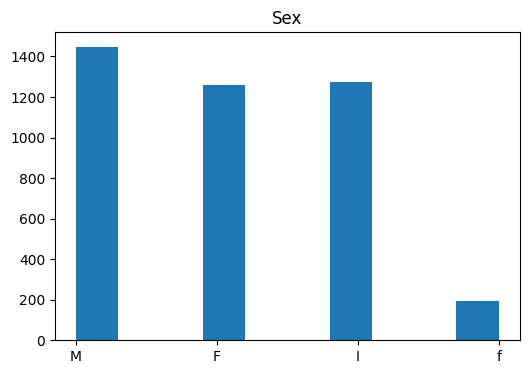

In [15]:
plt.figure(figsize=(6,4))

plt.title('Sex')
plt.hist(df['Sex']);

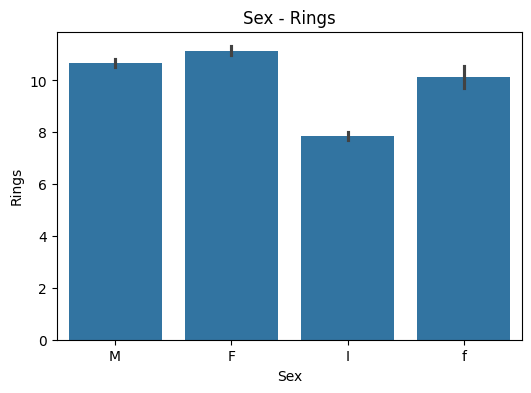

In [16]:
plt.figure(figsize=(6,4))

sns.barplot(x='Sex', y='Rings', data = df)
plt.title('Sex - Rings')
plt.show();

Среднее и медианное количество колец в каждой из половых категорий.

In [17]:
df.groupby('Sex').agg(RingsMean=('Rings', 'mean'),
                      RingsMedian=('Rings', 'median')).sort_values('RingsMean', ascending=False)

,RingsMean,RingsMedian
Sex,,
F,11.138205,10.0
M,10.678645,10.0
f,10.117949,10.0
I,7.872257,8.0


Для измерения связи между категориальным признаком и числовым признаком испольуется статистический метод ANOVA.

In [18]:
from scipy.stats import f_oneway

CategoryGroupLists = df.groupby('Sex')['Rings'].apply(list)

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  1.8545900446585218e-185
Features are correlated


Таким образом, согласно результатам статистического метода ANOVA, значения полового признака *Sex* и количества колец *Rings* коррелируют между собой.

######Length(Длинна)

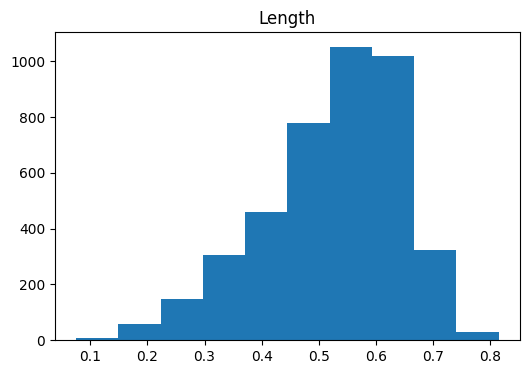

In [19]:
plt.figure(figsize=(6,4))

plt.title('Length')
plt.hist(df['Length']);

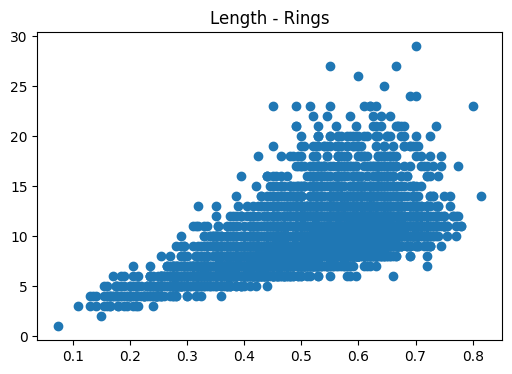

In [20]:
plt.figure(figsize=(6,4))

plt.scatter(df['Length'], df['Rings'])
plt.title('Length - Rings')
plt.show();

Коэффициент корреляции

In [21]:
np.corrcoef(df['Length'], df['Rings'])[0][1]

0.5567195769296179

In [22]:
df[['Length', 'Rings']].corr(method='spearman')['Length']['Rings']

0.6043853354046326

Исходя из полученного значения коэффициента корреляции можно сделать вывод, что между величинами *Length* и *Rings* наблюдается прямопропорциональная зависимость.

######Diameter(Диаметр)

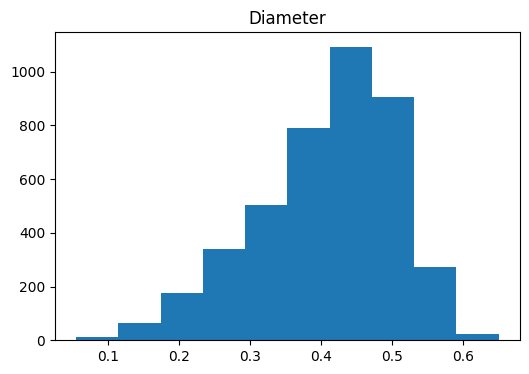

In [23]:
plt.figure(figsize=(6,4))

plt.title('Diameter')
plt.hist(df['Diameter']);

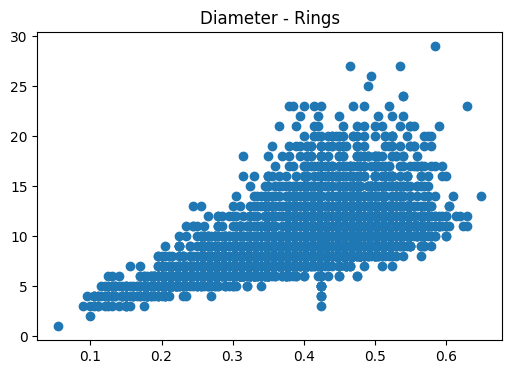

In [24]:
plt.figure(figsize=(6,4))

plt.scatter(df['Diameter'], df['Rings'])
plt.title('Diameter - Rings')
plt.show();

Коэффициент корреляции

In [25]:
np.corrcoef(df['Diameter'], df['Rings'])[0][1]

0.5635124396671253

In [26]:
df[['Diameter', 'Rings']].corr(method='spearman')['Diameter']['Rings']

0.6117884419286029

Полученное значение коэффициента корреляции свидетельствует о наличии прямопропорциональной зависимости между величинами *Diameter* и *Rings*.

######Height(Высота)

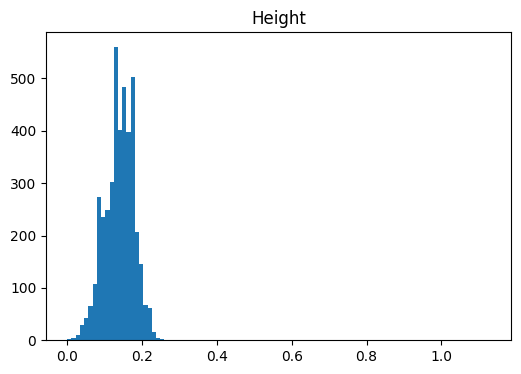

In [27]:
plt.figure(figsize=(6,4))

plt.title('Height')
plt.hist(df['Height'], bins=100);

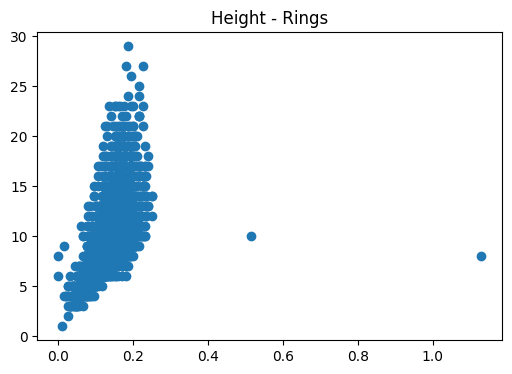

In [28]:
plt.figure(figsize=(6,4))

plt.scatter(df['Height'], df['Rings'])
plt.title('Height - Rings')
plt.show();

In [29]:
df.describe()['Height']

,Height
count,4177.000000
mean,0.139516
std,0.041827
min,0.000000
25%,0.115000
50%,0.140000
75%,0.165000
max,1.130000


Судя по распределению величины *Height* в данных присутствуют выбросы, от которых следует избавиться.


In [30]:
df.drop(df[df['Height'] == df['Height'].max()].index, inplace=True)

In [31]:
df.drop(df[df['Height'] == df['Height'].max()].index, inplace=True)

Коэффициент корреляции

In [32]:
np.corrcoef(df['Height'], df['Rings'])[0][1]

0.6096337419468181

In [33]:
df[['Height', 'Rings']].corr(method='spearman')['Height']['Rings']

0.6584515715587045

Таким образом, между величинами *Height* и *Rings* наблюдается прямопропорциональная зависимость.

######Whole weight(Полный вес)

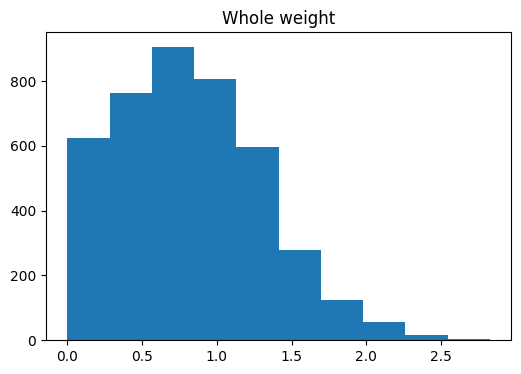

In [34]:
plt.figure(figsize=(6,4))

plt.title('Whole weight')
plt.hist(df['Whole weight']);

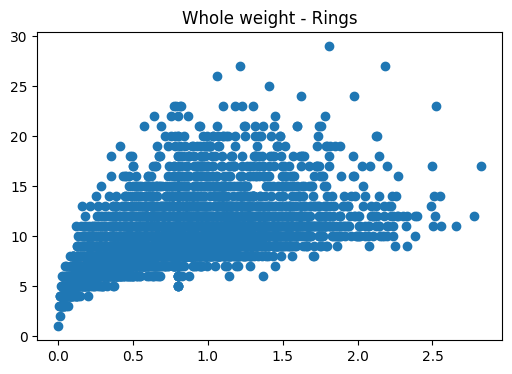

In [35]:
plt.figure(figsize=(6,4))

plt.scatter(df['Whole weight'], df['Rings'])
plt.title('Whole weight - Rings')
plt.show();

Коэффициент корреляции

In [36]:
np.corrcoef(df['Whole weight'], df['Rings'])[0][1]

0.5326240464096147

In [37]:
df[['Whole weight', 'Rings']].corr(method='spearman')['Whole weight']['Rings']

0.6219074328897763

Полученное значение коэффициента корреляции свидетельствует о наличии прямопропорциональной зависимости между величинами *Whole weight* и *Rings*.

######Shucked weight(Сброшенный вес или вес мяса)

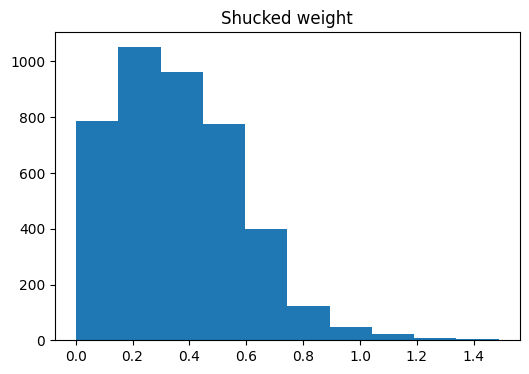

In [38]:
plt.figure(figsize=(6,4))

plt.title('Shucked weight')
plt.hist(df['Shucked weight']);

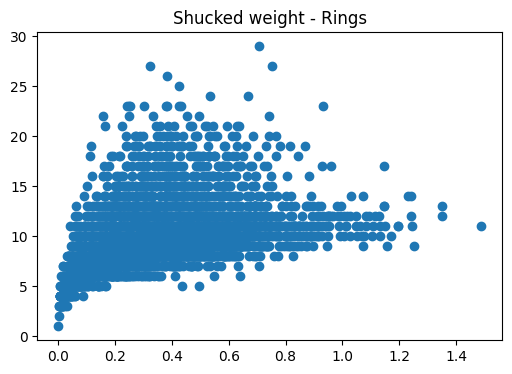

In [39]:
plt.figure(figsize=(6,4))

plt.scatter(df['Shucked weight'], df['Rings'])
plt.title('Shucked weight - Rings')
plt.show();

Коэффициент корреляции

In [40]:
np.corrcoef(df['Shucked weight'], df['Rings'])[0][1]

0.4214421438955101

In [41]:
df[['Shucked weight', 'Rings']].corr(method='spearman')['Shucked weight']['Rings']

0.5395250936782083

Исходя из полученного значения коэффициента корреляции можно сделать вывод, что между величинами *Shucked weight* и *Rings* наблюдается прямопропорциональная зависимость.

######Viscera weight(Вес внутренностей)

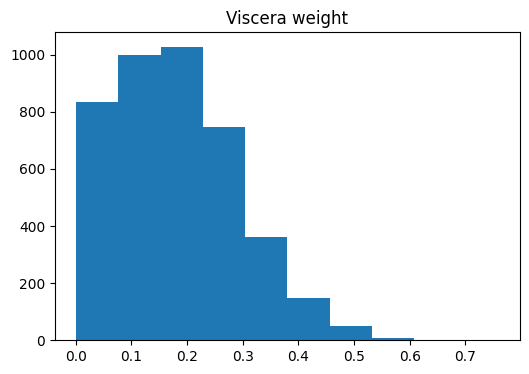

In [42]:
plt.figure(figsize=(6,4))

plt.title('Viscera weight')
plt.hist(df['Viscera weight']);

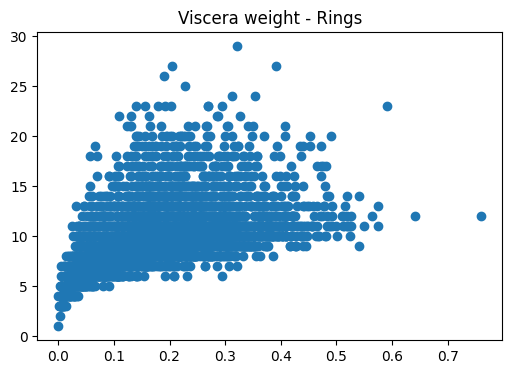

In [43]:
plt.figure(figsize=(6,4))

plt.scatter(df['Viscera weight'], df['Rings'])
plt.title('Viscera weight - Rings')
plt.show();

Коэффициент корреляции

In [44]:
np.corrcoef(df['Viscera weight'], df['Rings'])[0][1]

0.5042341475348567

In [45]:
df[['Viscera weight', 'Rings']].corr(method='spearman')['Viscera weight']['Rings']

0.6143562050720611

Таким образом, между величинами *Viscera weight* и *Rings* наблюдается прямопропорциональная зависимость.

######Shell weight(Вес после просушки)

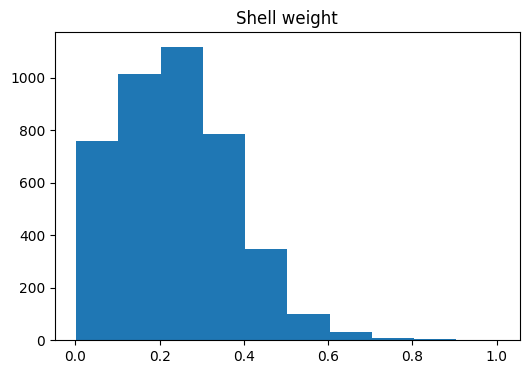

In [46]:
plt.figure(figsize=(6,4))

plt.title('Shell weight')
plt.hist(df['Shell weight']);

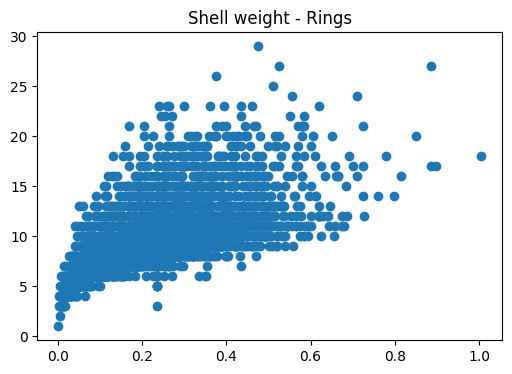

In [47]:
plt.figure(figsize=(6,4))

plt.scatter(df['Shell weight'], df['Rings'])
plt.title('Shell weight - Rings')
plt.show();

Коэффициент корреляции

In [48]:
np.corrcoef(df['Shell weight'], df['Rings'])[0][1]

0.622436002887016

In [49]:
df[['Shell weight', 'Rings']].corr(method='spearman')['Shell weight']['Rings']

0.685266103351543

Полученное значение коэффициента корреляции свидетельствует о наличии прямопропорциональной зависимости между величинами *Shell weight* и *Rings*.

###Построение матрицы корреляций

<Axes: >

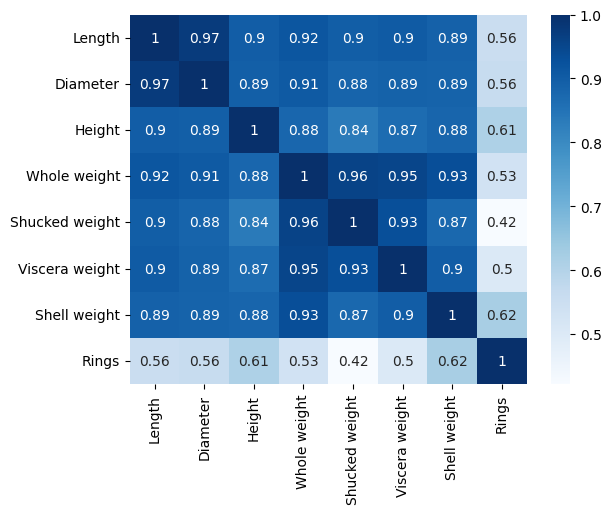

In [50]:
corr = df.loc[:, df.columns != 'Sex'].corr()

sns.heatmap(corr, cmap="Blues", annot=True)

На графике видно, что все числовые показатели сильно коррелируют между собой(положительно) и, как было подсчитано ранее, между целевой переменной *Rings*.
Таким обрзом, если строить модель только по одному показателю, то, на мой взгляд, лучше всего использовать значения из столбца *Shell weight*, поскольку именно с ними значения целевой переменной коррелируют наилучшим образом.

###Анализ целевой переменной

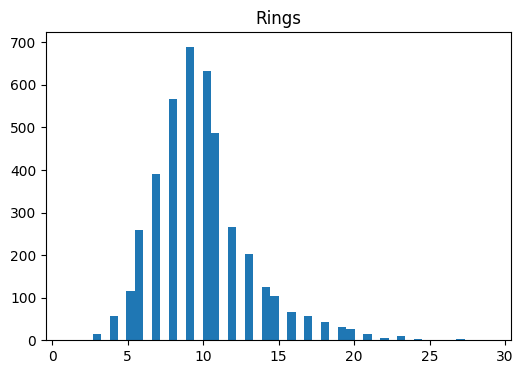

In [51]:
plt.figure(figsize=(6,4))

plt.title('Rings')
plt.hist(df['Rings'], bins=50);

Распределение целевой переменной близко к нормальному. Однако на графике виден тяжелый хвост, то есть небольшое количество аномально больших для нормального распределения значений переменной. Эти зачения ухудшат качесто потенциальной модели, так как их тяжело спрогнозировать.

### Практика использования библиотеки Polars

Увеличение датасета до ~1000000 записей

In [52]:
df_big = df

for i in range(250):
  df_big = pd.concat([df_big, df])


df_big.to_csv("abalone_big.csv", index=False)

Установка и импорт библиотеки Polaris

In [53]:
!pip install polars

import polars as pl

print(pl.__version__)

0.20.2


Сравнение производительности при загрузке данных

In [54]:
%%time

df_pl = pl.read_csv('abalone_big.csv')

CPU times: user 725 ms, sys: 170 ms, total: 895 ms
Wall time: 1.18 s


In [55]:
%%time

df_pd = pd.read_csv('abalone_big.csv')

CPU times: user 1.16 s, sys: 107 ms, total: 1.26 s
Wall time: 1.48 s


Время загруки данных при использовании библиотеки Polaris ~ в 2 раза меньше по сравнению с Pandas.

Сравнение производительности при фильтрации данных

In [56]:
%%time

df_pd[['Length', 'Rings']].head()

CPU times: user 7.71 ms, sys: 1.1 ms, total: 8.81 ms
Wall time: 7.2 ms


,Length,Rings
0,0.455,15
1,0.350,7
2,0.530,9
3,0.440,10
4,0.330,7


In [57]:
%%time

df_pl[['Length', 'Rings']].head()

CPU times: user 1.21 ms, sys: 171 µs, total: 1.38 ms
Wall time: 17.6 ms


Length,Rings
f64,i64
0.455,15
0.35,7
0.53,9
0.44,10
0.33,7


In [58]:
%%time

df_pd.query('Length > 0.5').head()

CPU times: user 43.9 ms, sys: 13.7 ms, total: 57.7 ms
Wall time: 79.4 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.33,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.26,16
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.32,19
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.21,14


In [59]:
%%time

df_pl.filter(pl.col('Length') > 0.5).head()

CPU times: user 33.9 ms, sys: 20.8 ms, total: 54.7 ms
Wall time: 121 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""F""",0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
"""F""",0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
"""F""",0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19
"""F""",0.525,0.38,0.14,0.6065,0.194,0.1475,0.21,14


Время загрузки данных при использовании библиотеки Polaris ~ на порядок меньше по сравнению с Pandas в случае фильтрации данных по выборке определенных столбцов и ~ одинаковое в случае фильтрации данных по условию.

Сравнение производительности при агрегации данных

In [60]:
%%time

df_pd.groupby('Sex').agg({'Length': 'mean', 'Rings': 'max'})

CPU times: user 110 ms, sys: 21.2 ms, total: 132 ms
Wall time: 156 ms


,Length,Rings
Sex,,
F,0.578927,29
I,0.427273,21
M,0.559959,27
f,0.535205,20


In [61]:
%%time

df_pl.groupby('Sex').agg([pl.mean('Length'), pl.max('Rings')])

CPU times: user 57 ms, sys: 4.93 ms, total: 62 ms
Wall time: 137 ms


<timed eval>:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.


Sex,Length,Rings
str,f64,i64
"""I""",0.427273,21
"""M""",0.559959,27
"""F""",0.578927,29
"""f""",0.535205,20


Время агрегации данных при использовании библиотеки Polaris ~ в 1,5-2 раза меньше по сравнению с Pandas.

#Построение ML моделей

###Наивный байесовский классификатор

Подготавливаем данные, исключая категориальню переменную *Sex* из датасета

In [69]:
X = df[[col for col in df.columns if col not in ('Sex', 'Rings')  ]]
y = df['Rings']

Импортируем из библиотеки **sklearn** функцию **train_test_split** для разбиения данных на обучающую и тестовую выборки

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Обучаем модель, используя класс **GaussianNB** из библиотеки **sklearn**

In [75]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

Для измерения качества модели используем функцию **accuracy_score** из библиотеки **sklearn**

In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.2614942528735632

###Метод k-ближайших соседей(KNN)

Импортируем класс **KNeighborsClassifier** из библиотеки **sklearn** и обучаем модель

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn_cl = KNeighborsClassifier()

knn_cl.fit(X_train, y_train)

pred_knn = knn_cl.predict(X_test)

Для оценки качества модели используем тот же показатель **accuracy_score**

In [77]:
accuracy_score(y_test, pred_knn)

0.23467432950191572

Качество моделей получилось низким.
Применение наивного байесовского классификатора показало лучший результат по сравнениию с KNN. Возможно качество возрастет после подбора гипперпараметров.


###Подбор гиперпараметров

При помощи функции **GridSearchCV** из блиблиотеки **sklearn** подберем гипперпараметры для модели наивного байесовского классификатора

In [84]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = GaussianNB()

params = {'var_smoothing': np.logspace(0,-9, num=100)}

gs = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=2)

Наилучшие параметры:

In [85]:
gs.best_score_, gs.best_params_

(0.24369328332531293, {'var_smoothing': 0.12328467394420659})

Оценка качества модели с подобранными параметрами:

In [86]:
pred = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, pred)

0.2883141762452107

При помощи функции **GridSearchCV** из блиблиотеки **sklearn** подберем гипперпараметры для модели, обученной с применением метода KNN

In [79]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 20, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

Наилучшие параметры:

In [80]:
gs.best_score_, gs.best_params_

(0.24497348374923011, {'n_neighbors': 18, 'p': 1, 'weights': 'uniform'})

Оценка качества модели с подобранными параметрами:

In [81]:
pred = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, pred)

0.2825670498084291

Таким образом, с помощью подбора гипперпараметров удалось немного улучшить качество моделей. Лучшее значение оценки качества продемонстрировала модель, обученная с использованием наивного байесовского классификатора.

###Учет категориальных признаков

Фильруем исходный датасет, исключая данные по целевой переменной

In [131]:
X_full = df.drop('Rings', axis=1)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.25, random_state=42)

Используем метод **One-hot Encoding** для перевода значений категориальной переменной в чсловой вид

In [128]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

categorical = ['Sex']
numeric_features = ['Length', 'Diameter', 'Height', "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = ct.fit_transform(X_train_full)
X_test_transformed = ct.transform(X_test_full)

In [132]:
new_features = list(ct.named_transformers_['ohe'].get_feature_names_out())
new_features.extend(numeric_features)

new_features

['Sex_F',
 'Sex_I',
 'Sex_M',
 'Sex_f',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [133]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_features)

X_train_transformed.head()

,Sex_F,Sex_I,Sex_M,Sex_f,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.0,0.0,0.0,0.689189,0.663866,0.60,0.331503,0.313383,0.266623,0.222720
1,0.0,0.0,1.0,0.0,0.695946,0.663866,0.62,0.308837,0.247478,0.280448,0.237668
2,0.0,1.0,0.0,0.0,0.317568,0.285714,0.30,0.054188,0.043040,0.048058,0.034878
3,0.0,0.0,1.0,0.0,0.736486,0.697479,0.58,0.384098,0.342972,0.356814,0.254111
4,0.0,0.0,0.0,1.0,0.385135,0.369748,0.34,0.069240,0.049428,0.053983,0.068261


Подбор гипперпараметров + обучение модели

In [176]:
model = GaussianNB()

params = {'var_smoothing': np.logspace(0,-9, num=100)}

gs = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train_transformed, y_train_full)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=2)

In [177]:
gs.best_score_, gs.best_params_

(0.21110817234399737, {'var_smoothing': 0.43287612810830584})

In [178]:
pred = gs.best_estimator_.predict(X_test_transformed)

accuracy_score(y_test_full, pred)

0.2557471264367816

Таким образом, при учете категориального призника качество модели снизилось на 0,03.